In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
dataset = pd.DataFrame(housing.data, columns= housing.feature_names)

In [5]:
dataset["target"]=housing.target
dataset["AveRooms"]

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: AveRooms, Length: 20640, dtype: float64

In [6]:
from sklearn.linear_model import LinearRegression
HX,HY =dataset["target"].values.reshape(-1,1),dataset["AveRooms"].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
HX_Train,HX_Test,HY_Train,HY_Test = train_test_split(HX,HY,test_size = 0.3)

In [8]:
regressor = LinearRegression()
regressor.fit(HX_Train,HY_Train)

LinearRegression()

As we can see the relation ship between the target and the predictor variable is quite a mess. Here we can not perform linear regression. 

In [9]:
regressor.coef_.item()

0.33022254865125455

In [10]:
regressor.intercept_.item()

4.752918136795761

In [11]:
def predict(X):
    result= X*regressor.coef_.item()+regressor.intercept_.item()
    return result.tolist()


In [12]:
fitted_values = predict(HY_Train)

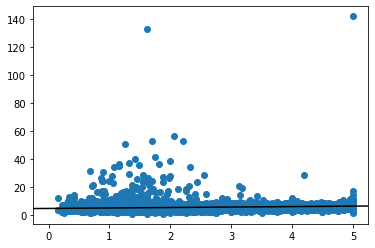

In [13]:
plt.scatter(HX_Train,HY_Train)
plt.axline(xy1=(0,regressor.intercept_.item()),slope = regressor.coef_.item(),color='k')

In [14]:
def standard_deviation(data,bias=0):
  x= data
  observations = float(len(data))
  std_dev = np.sqrt(np.sum((x-np.mean(x))**2)/observations-min(bias,1))
  return std_dev

In [15]:
def z_score(data):
  x = data
  zscore = (x-np.mean(x))/standard_deviation(x)
  return zscore

In [16]:
def corelation(var1,var2,bias =0):
  x= var1
  y=var2
  n = float(len(var1))
  correlation = np.sum((x-np.mean(x))*(y-np.mean(y)))/(n-min(bias,1))*(standard_deviation(x)*standard_deviation(y))
  return correlation
  

COLAB LAB SHORTA

Now we will draw the residuals graph, which is Original Answer Column or series - Predicted Values. The distance is what we are interested in. 

In [17]:
def residual_scatter_plot(HX_Train,HY_Train):
    Var1 =X
    Var2 = Y
    x_range=[np.min(X),np.max(X)]
    print(x_range)
    residual_scatter_plot = plt.plot(Var1,Var2,'bp')
    mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0],'--',linewidth=2)
    upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)],[0,3],'--',linewidth=2)
    lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)],[0,-3],'--',linewidth=2)
    return plt.grid()